In [35]:
% matplotlib inline
import datetime
import matplotlib.dates
import matplotlib.pyplot
import pandas

In [45]:
public_edits = pandas.read_csv("public_edits.csv", sep="\t")
private_edits = pandas.read_csv("private_edits.csv", sep="\t")

all_edits = pandas.merge(public_edits, private_edits, on='month')
# public_edits became edit_count_x, private became edit_count_y

def ratio_func(data):
    # FIXME: We need to skip empty cells.
    return data.edit_count_x / data.edit_count_y

all_edits = all_edits.assign(ratio=ratio_func)

def date_func(data):
    timestamps = [datetime.datetime.strptime(str(ts), "%Y%m") for ts in data.month]
    return matplotlib.dates.date2num(timestamps)

all_edits = all_edits.assign(date=date_func)

Graph the ratio of public to private edits over time.

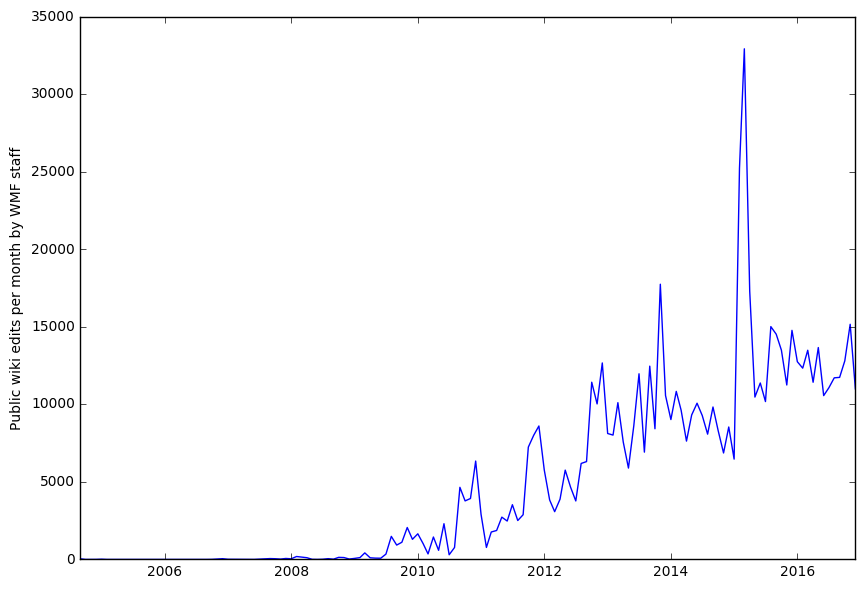

In [46]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 7))
dates = all_edits.get('date')
edits = all_edits.get('edit_count_x')

matplotlib.pyplot.ylabel("Public wiki edits per month by WMF staff")

ax.plot_date(dates, edits, 'b-')
matplotlib.pyplot.show()

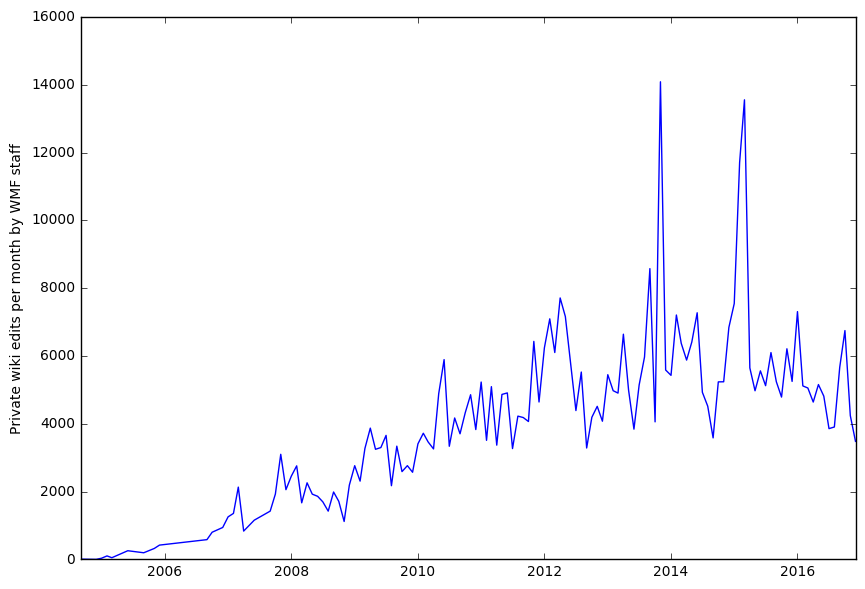

In [47]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 7))
dates = all_edits.get('date')
edits = all_edits.get('edit_count_y')

matplotlib.pyplot.ylabel("Private wiki edits per month by WMF staff")

ax.plot_date(dates, edits, 'b-')
matplotlib.pyplot.show()

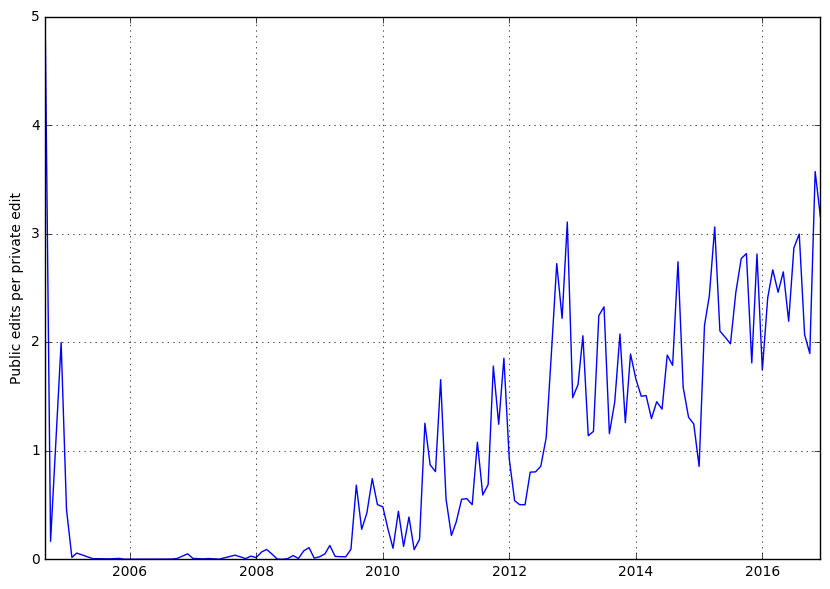

In [48]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 7))
dates = all_edits.get('date')
edits = all_edits.get('ratio')

matplotlib.pyplot.ylabel("Public edits per private edit")
matplotlib.pyplot.grid(True)

ax.plot_date(dates, edits, 'b-')
matplotlib.pyplot.show()

In [40]:
# pip install multiquery

'/home/adamw/wmf-open-editing'